In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')



In [3]:
# creating the database connection
conn = sqlite3.connect(r"C:\Users\Anshul\data\inventory.db")

# fetching vendor data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


Exploratory Data Analysis

1) Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

2) In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


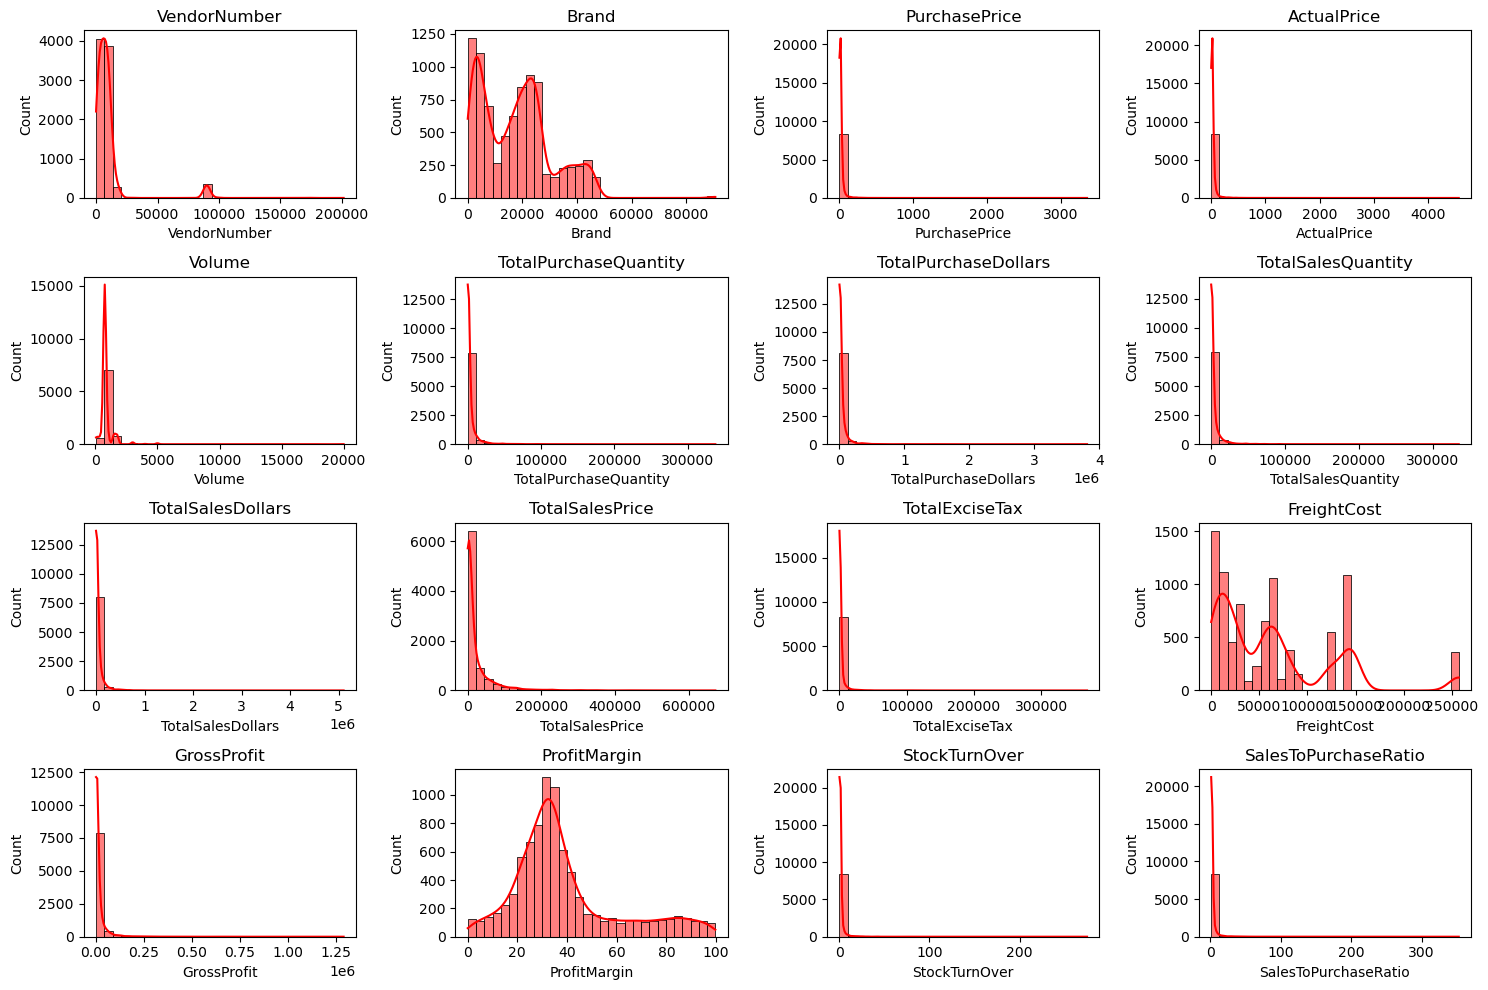

In [9]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30 , color = 'red')
    plt.title(col)
    

plt.tight_layout()
plt.show()


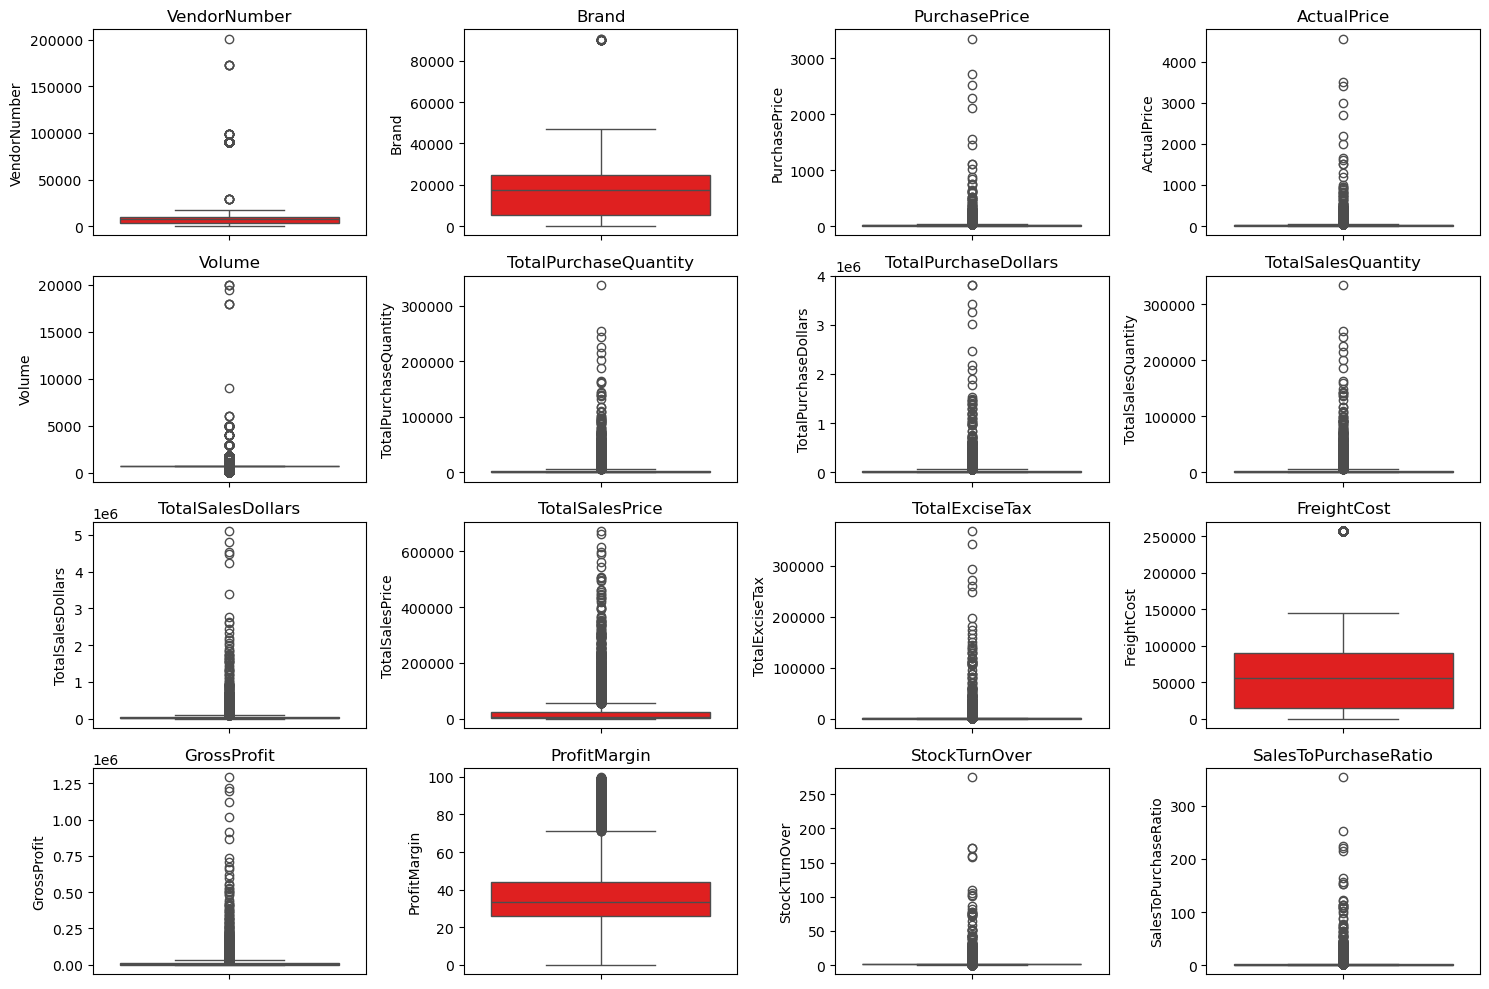

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.boxplot(df[col], color = 'red')
    plt.title(col)
    

plt.tight_layout()
plt.show()

## Negative & Zero Values:

• Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

• Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

• Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

## Outliers Indicated by High Standard Deviations:

• Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

• Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

• Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.


In [5]:
#removing inconsistence data
df = pd.read_sql_query("""Select * 
FROM vendor_sales_summary
WHERE TotalSalesQuantity >0
AND ProfitMargin>0
AND GrossProfit>0
""" , conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


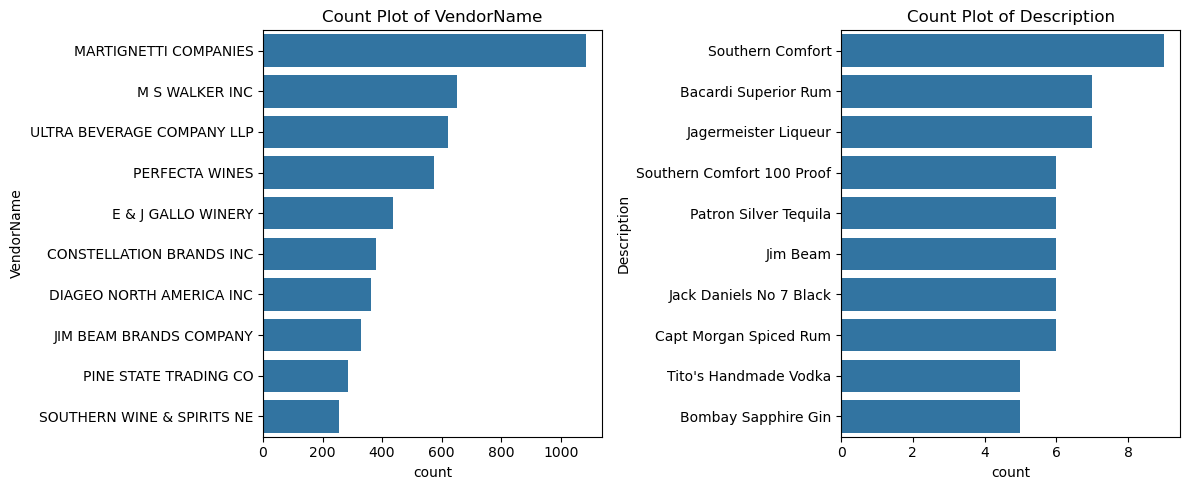

In [6]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


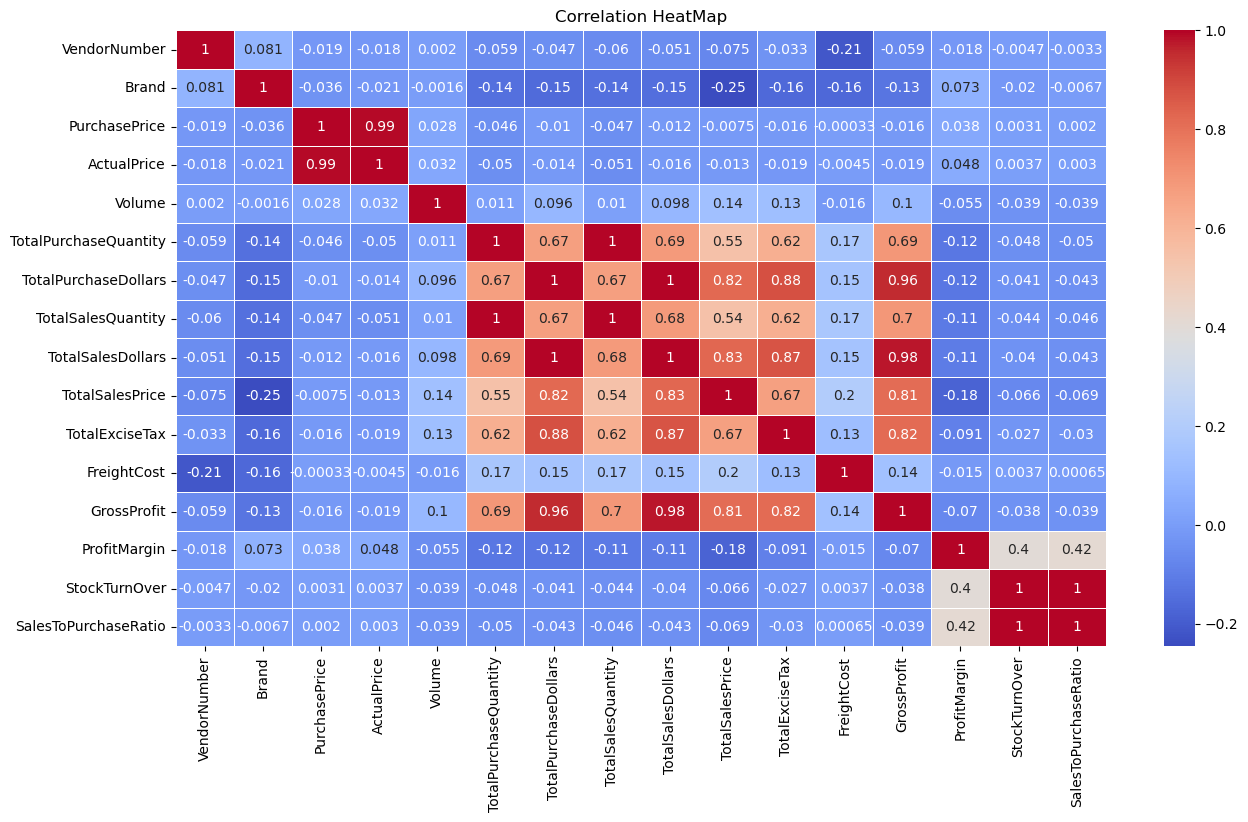

In [11]:
#Correlation HeatMap
plt.figure(figsize=(15,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix , annot = True , color = 'red' , cmap = 'coolwarm' , linewidths = 0.5)
plt.title('Correlation HeatMap')
plt.show()

### Correlation Insights

• PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

• Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

• Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

• StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.


### Problem Statement
##### 1) Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.


In [ ]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
brand_performance

In [ ]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance[ 'ProfitMargin'].quantile(0.85)

In [ ]:
print(low_sales_threshold  , high_margin_threshold)

In [ ]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


In [ ]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visuals

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin',
                color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',
                color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


### 2) Which Vendors and brands have the higgest sales performances

In [ ]:
def format_dollars(value):
    if(value>1000000):
        return f'{value/1000000:.2f}M'
    elif(value>1000):
        return f'{value/1000:.2f}K'
    else:
        return f'{value:.2f}'

In [ ]:
# Top Brands and Vendors By Sales Performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10) # Top 10
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10) # Top 10
top_vendors.apply(lambda x : format_dollars(x))

In [ ]:
top_brands.apply(lambda x : format_dollars(x))

In [ ]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


### 3) Which Vendors the contibute most to Total Purchase Dollars?

In [ ]:
vendor_performance = (
    df.groupby('VendorName')
      .agg({
          'TotalPurchaseDollars': 'sum',
          'GrossProfit': 'sum',
          'TotalSalesDollars': 'sum'
      })
      .reset_index()
)


In [ ]:
vendor_performance['PercentageContribution%'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100
vendor_performance

In [ ]:
vendor_performance = round(vendor_performance.sort_values('PercentageContribution%' , ascending = False),2)

In [ ]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10).reset_index()
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors


In [ ]:
top_vendors['PercentageContribution%'].sum()  # indicates that the top 10 vendors contributes more than 65% of the TotalPercentageDollars

In [ ]:
top_vendors['Cummlative_Contribution'] = top_vendors['PercentageContribution%'].cumsum()
top_vendors

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))

# Bar plot for Percentage Contribution
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PercentageContribution%'],
    palette="mako",
    ax=ax1
)

# Value labels on bars
for i, value in enumerate(top_vendors['PercentageContribution%']):
    ax1.text(
        i,
        value - 1,
        str(round(value, 2)) + '%',
        ha='center',
        fontsize=10,
        color='white'
    )

# Line plot for Cummlative Contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cummlative_Contribution'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cummlative Contribution'
)

# Labels and title
ax1.set_xlabel('Vendors')
ax1.set_ylabel('Percentage Contribution %', color='blue')
ax2.set_ylabel('Cummlative Contribution', color='red')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Fix x-axis overlap
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90, ha='right')

# Reference line
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


#### 4) How much of total procurement is dependent on the top vendors

In [ ]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PercentageContribution%'].sum(), 2)} %")


In [ ]:
vendors = list(top_vendors['VendorName'].values)

purchase_contributions = list(
    top_vendors['PercentageContribution%'].values
)

total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()


#### 5) Does Purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost 

In [ ]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']
df

In [ ]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'] , q=3 ,labels = ["Small" , "Medium" , "Large"])
df[['OrderSize' , 'TotalPurchaseQuantity']] # Catergorized in 3 groups to find out the optimal vol.

In [ ]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean() # unitprices $

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


1) Vendors who buy in bulk get the lowest unit price (around $10.78 per unit), which helps increase profit if inventory is managed well.

2) There is a big price gap between small and large orders, with unit cost dropping by nearly 72% for bulk purchases.

3) This shows that bulk pricing works well, as it encourages vendors to buy larger quantities and increases overall sales even though the price per unit is lower.

#### 6) Which vendors have low inventory turnover, indicating excess stock and slow-moving products?


In [ ]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)


#### 7) How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [ ]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))


In [ ]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)

inventory_value_per_vendor.head(10).reset_index()


#### 8) What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.


In [ ]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [ ]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [ ]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

1) Low-performing vendors have a higher profit margin range (40.48%–42.62%) compared to top-performing vendors (30.74%–31.61%).

2) This means vendors with lower sales often earn more profit per unit, possibly because of higher pricing or lower operating costs.

3) For top-performing vendors, improving profit could involve small price changes, reducing costs, or offering bundled products.

4) For low-performing vendors, even though margins are high, low sales suggest they may need better marketing, competitive pricing, or improved distribution.

#### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:
 
H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [ ]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


In [ ]:
brand_performance.to_csv("brand_performance.csv", index=False)

In [ ]:
vendor_performance['percentage_contribution'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100

In [ ]:
vendor_performance.to_csv("vendor_performance.csv" , index = False)